# **Trabajo Práctico Nº1**







# **Procesamiento del Lenguaje Natural**

**Facultad de Ciencias Exactas, Ingeniería y Agrimensura - TUIA**

**Integrantes: Menescaldi Brisa, Ferrero Santiago y Loza Santiago**

----

# **Introducción**

En el presente notebook se detallan los pasos y los conceptos aplicados para la resolución del Trabajo Práctico N°1 de la asignatura.
El mismo consiste en 5 ejercicios.

Al comienzo de cada ejercicio, importaremos las librerias necesarias que utilizamos para realizar el mismo.

----------

# **Ejericicio Nº1**

In [1]:
pip install beautifulsoup4

In [2]:
pip install lxml

In [3]:
import requests
#Codigo para evitar los warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [4]:
import pandas as pd
import csv
from bs4 import BeautifulSoup

A continuación, haremos web scraping sobre distintas secciones del Diario Clarin.

Las secciones de las que extraeremos noticias serán:


*   Politica
*   Deportes
*   Espectaculo
*   Tecnologia



Definiremos una función `scrap` que tome la URL de una sección de noticas del diario Clarin, y nos devolverá una lista de diccionarios, donde la estructura clave-valor de los diccionarios es la siguiente:


{url: "URL de la noticia" , titulo : "Titulo de la noticia" , texto: "Texto de la noticia"}

In [5]:
def scrap(url):
    # Dividimos el texto por / para poder obtener la categoría
    partes = url.split("/")

    # Ya que la categoria se encuentra al final de la URL, nos quedamos de esta manera con la misma
    categoria = partes[-1]

    # Realizamos una solicitud HTTP GET a la URL
    response = requests.get(url, verify=False)

    # Parseamos el contenido de la página web utilizando BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontramos todos los elementos 'div' con la clase específica
    links_noticias = soup.find_all('div', attrs={'class': 'sc-f933029d-0 bbAnGr onexone'})

    # Extraemos las URLs de las noticias
    links_noticias = [sec.a.get('href') for sec in links_noticias]

    # Inicializamos listas donde alamcenaremos las noticias y los titulos de las mismas
    noticias = []
    titulos = []

    # Recorremos las URLs de las noticias
    for link in links_noticias:
        # Completamos la URL de la noticia
        url = "https://www.clarin.com" + link

        # Realizamos una nueva solicitud HTTP GET a la URL de la noticia
        response = requests.get(url, verify=False)

        # Parseamos el contenido de la página de la noticia
        soup = BeautifulSoup(response.text, 'html.parser')

        # Obtenemos el título de la noticia
        titulo_del_articulo = soup.find('h1').text
        titulos.append(titulo_del_articulo)

        # Inicializamos una cadena para almacenar el texto de la noticia
        texto_del_articulo = ""

        try:
            # Encontramos los párrafos que contienen el texto de la noticia
            parrafos = soup.find('div', attrs={'class': 'StoryTextContainer'}).find_all('p')

            # Concatenamos los párrafos para obtener el texto completo de la noticia
            for parrafo in parrafos:
                texto_del_articulo += parrafo.text

            # Almacenamos la información de la noticia en una estructura de datos
            noticias.append({'url': url, 'titulo': titulo_del_articulo, 'texto': texto_del_articulo, 'categoria': categoria})
        except Exception as e:
            # En caso de error, continuamos con la siguiente noticia
            continue

    # Retornamos la lista de diccionarios
    return noticias


In [6]:
noticias_politica = scrap('https://www.clarin.com/politica')

In [7]:
noticias_deporte = scrap('https://www.clarin.com/deportes')

In [8]:
noticias_espectaculo = scrap('https://www.clarin.com/espectaculos')

In [9]:
noticias_tecnologia= scrap('https://www.clarin.com/tecnologia')

En base a pruebas realizadas, hemos observado que la cantidad de noticias en cada categoría varía generalmente entre alrededor de 30 y 40 noticias. Dado que la cantidad de noticias en las categorías no es siempre la misma, hemos decidido recortar las listas de acuerdo a la cantidad de elementos que tenga la lista con menos noticias.

In [10]:
# Encontramos la longitud minimo
longitud_minima = min(len(noticias_politica), len(noticias_deporte), len(noticias_espectaculo), len(noticias_tecnologia))

# Hacemos que todas las listas tengan la misma longitud
noticias_politica = noticias_politica[:longitud_minima]
noticias_deporte = noticias_deporte[:longitud_minima]
noticias_espectaculo = noticias_espectaculo[:longitud_minima]
noticias_tecnologia = noticias_tecnologia[:longitud_minima]

In [11]:
len(noticias_politica)

34

In [12]:
len(noticias_deporte)

34

In [13]:
len(noticias_espectaculo)

34

In [14]:
len(noticias_tecnologia)

34

Ahora, armaremos nuestro dataset

In [15]:
#Armamos el dataset
df = pd.DataFrame(noticias_politica)
df = df.append(noticias_deporte)
df= df.append(noticias_espectaculo)
df = df.append(noticias_tecnologia)

<ipython-input-15-948dbb192047>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(noticias_deporte)
<ipython-input-15-948dbb192047>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(noticias_espectaculo)
<ipython-input-15-948dbb192047>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(noticias_tecnologia)


In [16]:
df.head()

,url,titulo,texto,categoria
0,https://www.clarin.com/politica/chaco-ganarle-...,Chaco: tras ganarle a Capitanich por la gobern...,"El dirigente radical Roy Nikisch, exgobernador...",politica
1,https://www.clarin.com/politica/negocio-derrot...,El negocio de una derrota para Macri y Cristin...,Las fuerzas políticas mayoritarias han mandado...,politica
2,https://www.clarin.com/opinion/campana-escanda...,La campaña más escandalosa de las últimas décadas,Hubo una vez un electorado que elegía a un can...,politica
3,https://www.clarin.com/politica/extrana-estrat...,La extraña estrategia de Massa con las encuest...,En la previa de la elección presidencial de 20...,politica
4,https://www.clarin.com/economia/despues-debate...,"Después del debate y antes de la veda, Javier ...","Siempre entusiasta y locuaz, Esther Luna es ge...",politica


In [17]:
#Dimensión del dataframe
df.shape

(136, 4)

In [18]:
# Pasamos nuestro DF a CSV
df.to_csv('df.csv',index=False)

In [19]:
#Leemos nuestro dataset en formato CSV
data = pd.read_csv('df.csv')

# **Ejercicio Nº2**

In [20]:
import numpy as np
import re
import unicodedata
import nltk


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lo que haremos en el siguiente codigo será generar una lista llamada `dataset`. En la misma, se guardaran tuplas del tipo ("Categoria" , "Titulo")

In [21]:
#Establecemos las categorias
labels = [(0, "politica"), (1, "deportes"), (2, "espectaculos"), (3, "tecnologia")]

dataset= []
with open('df.csv', 'r') as archivo:
  lector = csv.reader(archivo)
  for fila in lector:
    titulo = fila[1]
    categoria = fila[3]
    if categoria == 'politica':
      dataset.append((0,titulo))
    elif categoria == 'deportes':
      dataset.append((1,titulo))
    elif categoria == 'espectaculos':
      dataset.append((2,titulo))
    elif categoria == 'tecnologia':
      dataset.append((3,titulo))


In [22]:
#Ejemplo
dataset[0]

(0,
 'Chaco: tras ganarle a Capitanich por la gobernación, Juntos por el Cambio también se impone en Resistencia ')

**Preparar X e Y**

In [23]:
#como nuestro Y son categorias codificadas solo procesaremos los datos de X
X = [text for label, text in dataset]
y = [label for label, text in dataset]

In [24]:
#Transformamos a letra minuscula todos los textos
X = [text.lower() for label, text in dataset]

No aplicamos técnicas de normalización en nuestros títulos de noticias, ya que preferimos mantener los datos en su forma original, preservando así las características específicas del lenguaje. Además, son títulos de noticias de un diario como lo es Clarín, en base a esto, consideramos que la escritura es correcta y clara.


In [25]:
#Dividimos nuestros datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [26]:
# Descargamos el conjunto de stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

# Vectorización de los textos con eliminación de palabras vacías
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Creación y entrenamiento del modelo de Regresión Logística
modelo_LR = LogisticRegression(max_iter=100)
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Precisión Regresión Logística: 0.8214285714285714
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.88      0.78      0.82         9
           2       0.71      0.83      0.77         6
           3       0.88      0.88      0.88         8

    accuracy                           0.82        28
   macro avg       0.82      0.82      0.82        28
weighted avg       0.83      0.82      0.82        28



Analizando las métricas del modelo, podemos concluir que las mismas varian dia a dia. Esto se debe a que al hacer web scraping sobre las secciones del Diario Clarin, en lugar de hacer sobre noticias especificas, las noticias con las que se entrena el modelo van variando. Dado que las noticias pueden variar en claridad, y que tan bueno es su contenido, es normal que el modelo refleje esta variabilidad de métricas.

Analizaremos las métricas del modelo de acuerdo a los resultados vistos durante varios dias

`Precisión Regresión Logística`: El modelo tiende a tener una precisión arriba del 70%, entonces dicho porcentaje de las predicciones son correctas.

`Precision`: Generalmente la precisión varía entre un 60% y un 100%, entonces en promedio, el modelo tiene un buen control de las predicciones positivas.

`Recall`: Con una variación entre el 65% y el 100% vemos que el modelo es eficiente en recuperar las muestras relevantes.

`F1-Score`: Existe un equilibrio razonable entre precisión y recall, siempre es superior al 70%.

`Accuracy`: La precisión global del modelo siempre se encuentra por encima del 70%, esto nos indica el porcentaje de predicciones que son correctas en el conjunto de prueba.

`Macro avg y Weighted avg`: Los promedios son siempre mayores al 70% indicando el rendimiento general del modelo.

**Testeamos nuesto modelo**

In [27]:
# Definimos una lista de noticias para clasificar
nuevas_noticias = [
    "Balotaje: de cuánto es la multa por no votar en las Elecciones CABA",
    "La inteligencia artificial se hace mejor si todo el mundo participa en su desarrollo”: qué es Hugging Face, el sistema abierto de IA",
    "Vuelve el Cine Argenino: Esto es lo nuevo de Darin",
    "A 8 años del robo a Rosario Central, Boca pierde la final de la Copa Libertadores",
]

# Convertimos las noticias a minúsculas
nuevas_frases = [frase.lower() for frase in nuevas_noticias]

# Transformamos las nuevas noticias usando el vectorizador que usamos para entrenar el modelo
nuevas_frases_vectorizadas = vectorizer.transform(nuevas_frases)

# Usamos el modelo entrenado para predecir las etiquetas de las nuevas noticias
etiquetas_predichas = modelo_LR.predict(nuevas_frases_vectorizadas)

# Imprimimos las etiquetas predichas
for i, etiqueta in enumerate(etiquetas_predichas):
    print(f"La noticia '{nuevas_frases[i]}' pertenece a la categoría: {labels[etiqueta][1]}")

La noticia 'balotaje: de cuánto es la multa por no votar en las elecciones caba' pertenece a la categoría: politica
La noticia 'la inteligencia artificial se hace mejor si todo el mundo participa en su desarrollo”: qué es hugging face, el sistema abierto de ia' pertenece a la categoría: tecnologia
La noticia 'vuelve el cine argenino: esto es lo nuevo de darin' pertenece a la categoría: espectaculos
La noticia 'a 8 años del robo a rosario central, boca pierde la final de la copa libertadores' pertenece a la categoría: deportes


Vemos que el modelo nos clasifica las noticias de manera correcta de acuerdo a su categoría.

# **Ejercicio Nº3**

In [28]:
!pip install wordcloud

In [29]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.6 MB/s eta 0:00:00


In [30]:
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import emoji

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lo que haremos en el siguiente codigo será, generar una listas con nombres de las categorias. En las mismas, se guardaran los cuerpos de las noticias de su respectiva categoria.

In [31]:
#Extraemos los textos de cada categoria
politica= []
deporte=[]
espectaculo=[]
tecnologia = []
with open('df.csv', 'r') as archivo:
  lector = csv.reader(archivo)
  for fila in lector:
    texto = fila[2]
    categoria = fila[3]
    if categoria == 'politica':
      politica.append(texto)
    elif categoria == 'deportes':
      deporte.append(texto)
    elif categoria == 'espectaculos':
      espectaculo.append(texto)
    elif categoria == 'tecnologia':
      tecnologia.append(texto)

In [32]:
#Ejemplo
deporte[0]

'Al menos cinco personas fallecieron este domingo, luego de un terrible accidente ocurrido por la tarde entre localidades cordobesas de Corralito y Monte Ralo, cuando chocaron en la ruta provincial 253 frontalmente una Traffic, en la que viajaban los jugadores de la Reserva del club Casino de Río Tercero, y una Toyota Hilux.Una de las personas que murió en el acto fue el papá de uno de los chicos que acompañaba a la delegación del club cordobés, mientras que el chofer de la Toyota falleció en un hospital cercano, donde fue trasladado en un gravísimo estado. Por el momento, se desconoce la identidad de las otras tres víctimas. En tanto, el resto de los heridos fueron trasladados al Hospital de Despeñaderos y de Río Tercero, según informó la Policía local.Luego del terrible impacto, los dos vehículos se prendieron fuego y las llamas se extendieron en el campo de la zona. Por eso, además de efectivos policiales y de Caminera y servicios de emergencias, también intervinieron los bomberos. 

# Normalización y limpieza.



En primer lugar, definiremos las siguientes funciones:


*   `remove_accents` : Toma un texto y le quita los tildes.
*   `remove_stopwords` : Toma un texto y le remueve las stopwords definidas anteriormente como `spanish_stop_words`
*   `remove_emojis` : Toma un texto y en caso de poseer emojis, se los elimina.
*    `remove_twitter_links` : Toma un texto y en caso de poseer links de twitter (imagenes), se los elimina.


In [33]:
#Funcion para eliminar tildes
def remove_accents(texto):
  nfkd_form = unicodedata.normalize('NFKD', texto)
  return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Función para eliminar las palabras de parada de un texto
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in spanish_stop_words]
    return " ".join(filtered_text)

# Función para eliminar los emojis de un texto
def remove_emojis(text):
    texto_sin_emojis = emoji.demojize(text)
    return texto_sin_emojis

# Función para eliminar los links de twitter (imagenes) de un texto
def remove_twitter_links(text):
    # Utiliza una expresión regular para encontrar y eliminar las cadenas que comienzan con "pic.twitter.com"
    text_no_twitter_links = re.sub(r'pic\.twitter\.com\S+', '', text)
    return text_no_twitter_links


Haremos una función `normalizar` que recibe una lista de textos y nos devuelva la misma con los textos normalizados y limpios.

In [34]:
def normalizar(lista):
  for i in range(len(lista)):

    #Eliminamos emojis
    lista[i] = remove_emojis(lista[i])

    #Eliminamos imagenes de twitter
    lista[i] = remove_twitter_links(lista[i])

    #Expresion regular para eliminar puntuaciones
    lista[i] = re.sub(r'[^\w\s]',' ',lista[i])

    #Eliminamos Stopwords
    lista[i] = remove_stopwords(lista[i])

    #Eliminamos acentos
    lista[i] = remove_accents(lista[i])

  #Transformamos a letra minuscula todos los textos
  lista= [text.lower() for text in lista]

  return lista

In [35]:
politica = normalizar(politica)
deporte = normalizar(deporte)
espectaculo = normalizar(espectaculo)
tecnologia = normalizar(tecnologia)

**Tokenización de texto**

Utilizamos `word_tokenize` para tokenizar aunque también podríamos haber utilizado `TextBlob`.

In [36]:
def tokenizar(lista):
  # Nuestro texto de trabajo
  texto = ''
  for i in lista:
    i = word_tokenize(i)
    # Convierte la lista de palabras tokenizadas en una cadena de texto
    i = ' '.join(i)
    texto += i
  return texto

In [37]:
politica = tokenizar(politica)
deporte = tokenizar(deporte)
espectaculo = tokenizar(espectaculo)
tecnologia = tokenizar(tecnologia)

**Frecuencia**

In [38]:
def frecuencia(texto):
    # Tokenizamos el texto en palabras
    words = word_tokenize(texto)

    # Creamos un objeto FreqDist para las palabras
    fdist_words = FreqDist(words)

    # Obtenemos las 5 palabras más frecuentes
    top_words = fdist_words.most_common(5)

    # Imprimimos el top 5 de palabras más frecuentes
    print('Top 5 palabras más frecuentes:')
    for word, frequency in top_words:
        print(f'{word}: {frequency}')

In [39]:
frecuencia(politica)

Top 5 palabras más frecuentes:
milei: 184
massa: 140
candidato: 82
si: 82
dos: 69


In [40]:
frecuencia(deporte)

Top 5 palabras más frecuentes:
boca: 71
copa: 60
final: 60
libertadores: 48
argentina: 42


In [41]:
frecuencia(espectaculo)

Top 5 palabras más frecuentes:
dos: 65
anos: 63
ser: 58
ano: 47
si: 45


In [42]:
frecuencia(tecnologia)

Top 5 palabras más frecuentes:
ia: 82
puede: 58
si: 52
google: 46
usuarios: 44


**Nubes de palabras**

In [43]:
def nube(texto):
    # Crear la nube de palabras
  wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = None,
                    min_font_size = 10).generate(texto)

    # Mostrar la imagen
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

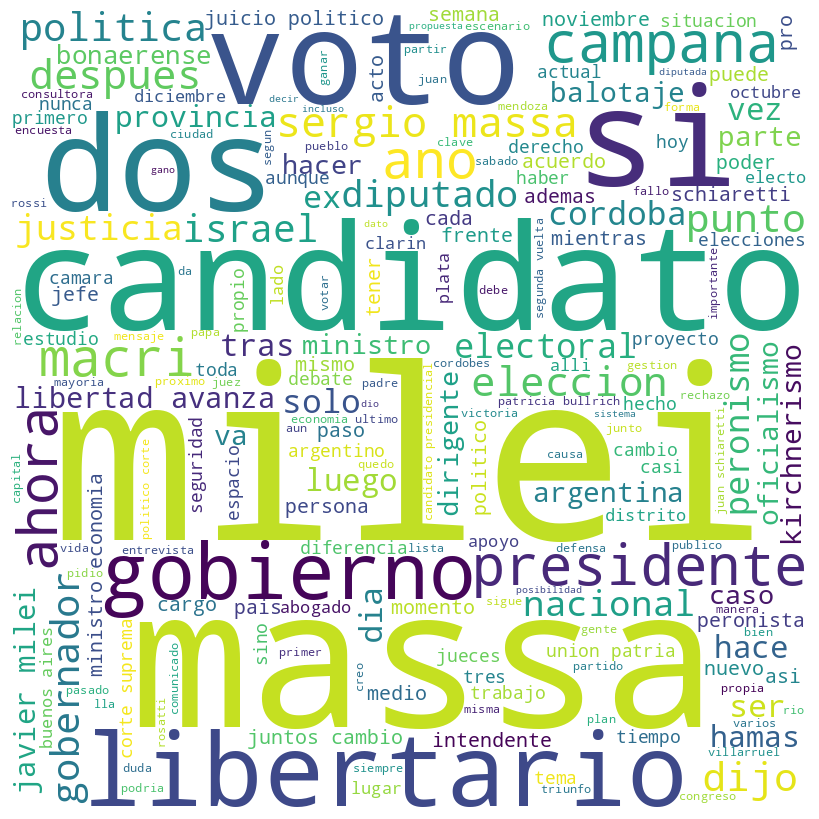

In [44]:
nube(politica)

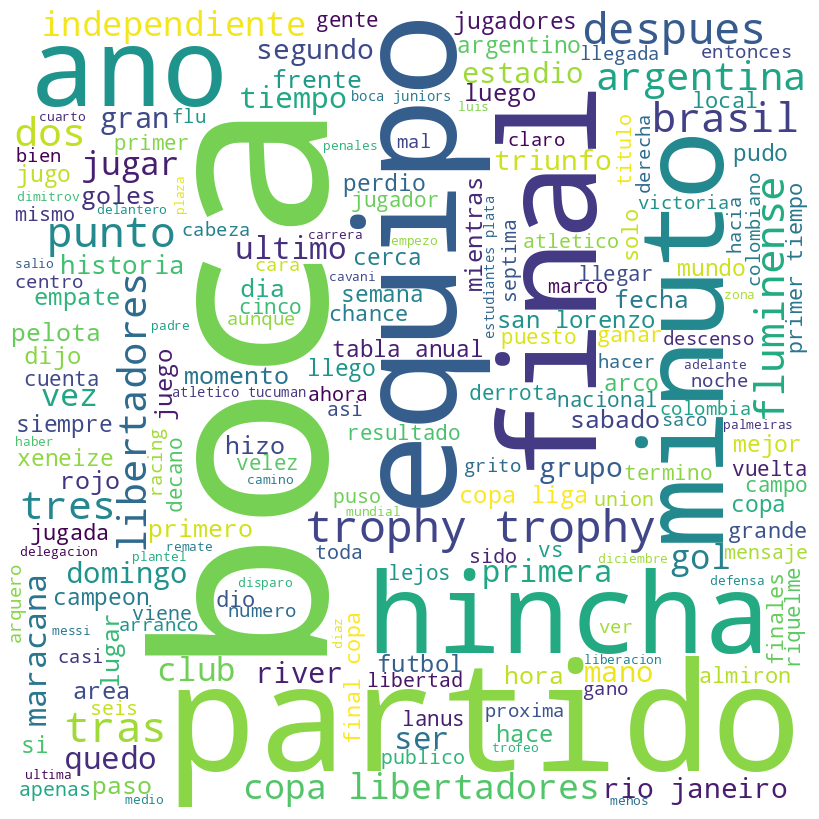

In [45]:
nube(deporte)

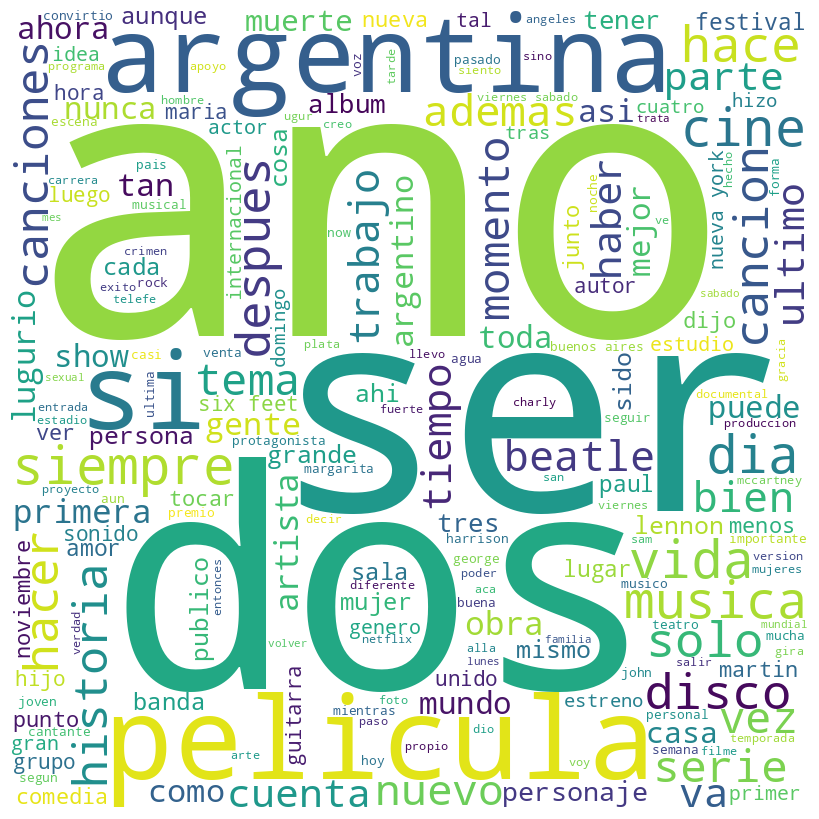

In [46]:
nube(espectaculo)

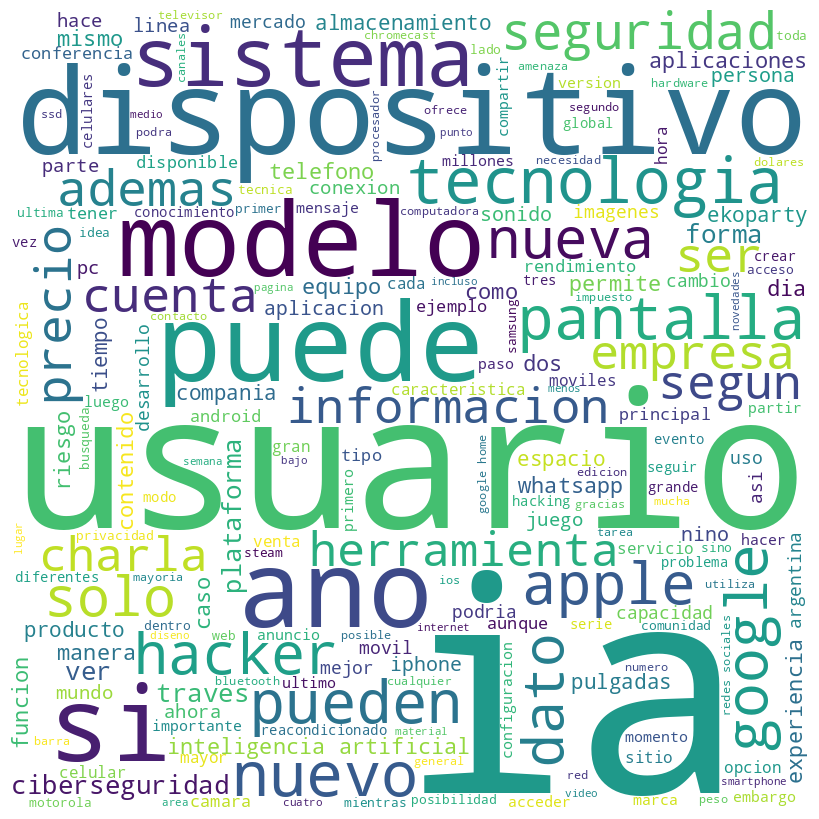

In [47]:
nube(tecnologia)

Las palabras se presentan en tamaños proporcionales a su frecuencia en el texto, lo cuál puede ser útil para identificar las palabras claves más frecuentes en un texto o, en este caso, para resaltar las palabras mas importantes en los textos de las distintas categorias de noticias.

Las palabras mas relevantas de cada sección tienen sentido y son acordes a lo que la misma representa.





# **Ejercicio Nº4**

In [48]:
!pip install gensim

In [49]:
%%capture
!pip install sentence-transformers

In [50]:
import tensorflow
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity
from prettytable import PrettyTable
import numpy as np
import torch


from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np


from sentence_transformers import SentenceTransformer, util
import numpy as np
from prettytable import PrettyTable

Utilizamos los títulos de la categoría **deporte** para comparar los 3 modelos de embedding.

**Universal Sentence Encoder**

In [51]:
titulos_deporte = [d['titulo'] for d in noticias_deporte if 'titulo' in d]

In [52]:
#Carga el modelo Universal Sentence Encoder de TensorFlow Hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Lista de strings que deseas comparar
lista_titulos = titulos_deporte


# Obtiene embeddings para los strings en la lista
embeddings = embed(lista_titulos)

# Calcula la matriz de similitud
matriz_similitud = cosine_similarity(embeddings)

# Encontramos las puntuaciones de similitud más altas
pares = []
for i in range(len(matriz_similitud)-1):
    for j in range(i+1, len(matriz_similitud)):
        pares.append({'index': [i, j], 'score': matriz_similitud[i][j]})

# Ordenamos las puntuaciones en orden decreciente
pares = sorted(pares, key=lambda x: x['score'], reverse=True)

# Creamos una tabla para mostrar los resultados
tabla = PrettyTable()
tabla.field_names = ["Titilos 1", "Titulos 2", "Puntuación de Similitud"]

# Añadimos las filas a la tabla
for par in pares[0:10]:
    i, j = par['index']
    tabla.add_row([lista_titulos[i], lista_titulos[j], f"{par['score']:.4f}"])

# Mostramos la tabla
print(tabla)

+-------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                                                                 Titilos 1                                                                 |                                                                 Titulos 2                                                                 | Puntuación de Similitud |
+-------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                      Newell's vs Sarmiento de Junín, por la Copa de la Lig

Podemos observar que el modelo `Universal Sentence Encoder` nos devuelve una buena puntuación de similitud entre los títulos de las noticias. Entonces, resulta ser un modelo altamente efectivo para el caso particular que estamos planteando.


**Doc2Vec**

In [53]:
# Lista de strings que deseas comparar
lista_titulos = titulos_deporte

# Tokenizar los datos y etiquetarlos
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(lista_titulos)]

# Configurar parámetros para el modelo
model = Doc2Vec(vector_size=20, window=2, min_count=1, workers=4, epochs=1000)

# Construir el vocabulario
model.build_vocab(tagged_data)

# Entrenar el modelo
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Obtener los vectores de embeddings para todos los documentos
embeddings = [model.infer_vector(doc.split()) for doc in lista_titulos]

# Calculamos las puntuaciones de similitud
matriz_similitud = cosine_similarity(embeddings)


# Encontramos las puntuaciones de similitud más altas
pares = []
for i in range(len(matriz_similitud)-1):
    for j in range(i+1, len(matriz_similitud)):
        pares.append({'index': [i, j], 'score': matriz_similitud[i][j]})

# Ordenamos las puntuaciones en orden decreciente
pares = sorted(pares, key=lambda x: x['score'], reverse=True)

# Creamos una tabla para mostrar los resultados
tabla = PrettyTable()
tabla.field_names = ["Titulos 1", "Titulos 2", "Puntuación de Similitud"]

# Añadimos las filas a la tabla
for par in pares[0:10]:
    i, j = par['index']
    tabla.add_row([lista_titulos[i], lista_titulos[j], f"{par['score']:.4f}"])

# Mostramos la tabla
print(tabla)

+---------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                                                                  Titulos 1                                                                  |                                                                  Titulos 2                                                                  | Puntuación de Similitud |
+---------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                       Newell's vs Sarmiento de Junín, por la C

Podemos observar que el modelo `Doc2Vec` nos devuelve una puntuación más baja comparado con `Universal Sentence Encoder`, puede deberse a las diferentes formas en las que estos modelos calculan la similitud.


**Sentence-BERT (S-BERT)**

In [54]:
%%capture
!pip install sentence-transformers

In [55]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable

# Cargamos el modelo preentrenado multilingüe
modelo_sbert = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Lista de strings que deseas comparar
lista_titulos = titulos_deporte

# Codificamos las oraciones
embeddings = modelo_sbert.encode(lista_titulos, convert_to_tensor=True)

# Calculamos las puntuaciones de similitud
matriz_similitud = util.cos_sim(embeddings, embeddings)


# Encontramos las puntuaciones de similitud más altas
pares = []
for i in range(len(matriz_similitud)-1):
    for j in range(i+1, len(matriz_similitud)):
        pares.append({'index': [i, j], 'score': matriz_similitud[i][j]})

# Ordenamos las puntuaciones en orden decreciente
pares = sorted(pares, key=lambda x: x['score'], reverse=True)

# Creamos una tabla para mostrar los resultados
tabla = PrettyTable()
tabla.field_names = ["Titulos 1", "Titulos 2", "Puntuación de Similitud"]

# Añadimos las filas a la tabla
for par in pares[0:10]:
    i, j = par['index']
    tabla.add_row([lista_titulos[i], lista_titulos[j], f"{par['score']:.4f}"])

# Mostramos la tabla
print(tabla)

+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                                                                  Titulos 1                                                                  |                                                                 Titulos 2                                                                 | Puntuación de Similitud |
+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                Fluminense, campeón de la Libertadores: los motivos q

Podemos notar que las puntuaciones no son tan bajas como en
`Doc2Vec`, ni tan altas como en `Universal Sentence Encoder`. Las diferencias pueden ser por las distintas arquitecturas y enfoques utilizados por cada modelo.

En general, la elección del modelo depende de las necesidades específicas que se buscan y los datos con los que estamos trabajando por ejemplo la calidad de estos.

A su vez debemos destacar que el modelo `Universal Sentence Encoder` utiliza una arquitectura de redes neuronales profundas ya preentrenada por lo que esto puede hacer una evaluación de similitud más alta en comparación con los otros dos modelos.

# **Ejercicio Nº5**

In [56]:
%%capture
!pip install spacy
!python -m spacy download es_core_news_md

In [57]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

Lo que haremos en el siguiente código será, generar listas llamadas como los nombres de las categorías. En las mismas, se guardarán los cuerpos de las noticias de su respectiva categoría.

In [58]:
#Extraemos los textos de cada categoría
politica= []
deporte=[]
espectaculo=[]
tecnologia = []
with open('df.csv', 'r') as archivo:
  lector = csv.reader(archivo)
  for fila in lector:
    texto = fila[2]
    categoria = fila[3]
    if categoria == 'politica':
      politica.append(texto)
    elif categoria == 'deportes':
      deporte.append(texto)
    elif categoria == 'espectaculos':
      espectaculo.append(texto)
    elif categoria == 'tecnologia':
      tecnologia.append(texto)

In [59]:
#Ejemplo
deporte[0]

'Al menos cinco personas fallecieron este domingo, luego de un terrible accidente ocurrido por la tarde entre localidades cordobesas de Corralito y Monte Ralo, cuando chocaron en la ruta provincial 253 frontalmente una Traffic, en la que viajaban los jugadores de la Reserva del club Casino de Río Tercero, y una Toyota Hilux.Una de las personas que murió en el acto fue el papá de uno de los chicos que acompañaba a la delegación del club cordobés, mientras que el chofer de la Toyota falleció en un hospital cercano, donde fue trasladado en un gravísimo estado. Por el momento, se desconoce la identidad de las otras tres víctimas. En tanto, el resto de los heridos fueron trasladados al Hospital de Despeñaderos y de Río Tercero, según informó la Policía local.Luego del terrible impacto, los dos vehículos se prendieron fuego y las llamas se extendieron en el campo de la zona. Por eso, además de efectivos policiales y de Caminera y servicios de emergencias, también intervinieron los bomberos. 

Definimos una función `procesar` que recibe una lista de tuplas y se le aplica la función `remove_emojis` y `remove_twitter_links` al segundo elemento de cada tupla. Devuelve una nueva lista con las modificaciones a cada tupla.

In [60]:
def procesar(lista):
  lista_procesada = []
  for i in range(len(lista)):

    #Eliminamos emojis
    texo_sin_emojis = remove_emojis(lista[i][1])

    #Eliminamos imagenes de twitter
    texto_sin_pic = remove_twitter_links(texo_sin_emojis)

    #Agregamos la tuplca con el texto procesado
    lista_procesada.append((lista[i][0],texto_sin_pic))

  return lista_procesada

A continuación, crearemos una función `eleccion` que le mostrará al usuario un menú de opciones, y le pedirá que ingrese una categoría de las mostradas. Devuelve una lista de tuplas (titulo-texto) de las noticias de la categoría que el usuario ingresó.

In [61]:
def eleccion():

  #Nuestras categorias
  categorias = df['categoria'].unique()

  #Cantidad de categorias
  cantidad = df['categoria'].nunique()

  #Categorias visualizadas
  cat = []

  contador = 0
  print("Categorias disponibles: ")

  #Iteramos sobre las categorias
  for categoria in categorias:
    print(contador,') ' , categoria)
    contador+=1
    cat.append(categoria)


  #Pedimos al usuario que ingrese la categoria de la que desea recibir el resumen
  categoria_usuario = int(input("Ingrese el numero de la categoria que desea ver el resumen: "))

  #Validamos que el usuario ingrese una categoria valida
  if categoria_usuario not in range(0, cantidad+1):
    return "Error. Ingrese una categoria valida"

  else:

    categoria_usuario = cat[categoria_usuario]
    lista_de_noticias = []

    for index, row in df.iterrows():
        titulo = row['titulo']
        categoria = row['categoria']

        if categoria_usuario == categoria:
            # filtramos solo la categoria que el usuario indique

            texto_noticia = row['texto']
            tupla_noticia = (titulo, texto_noticia)
            lista_de_noticias.append(tupla_noticia)


  #Devuelve una lista (titulo-texto) de la categoria que el usuario ingreso
  return lista_de_noticias

Haciendo uso de la función que definimos recientemente, el programa devuelve el título y un resumen de todas las noticias de la categoría que el usuario ingresó.

In [62]:
def summarize(similarity_matrix, num_sentences=10):
    # Crear un grafo a partir de la matriz de similitud
    nx_graph = nx.from_numpy_array(similarity_matrix)
    # Aplicar PageRank al grafo
    scores = nx.pagerank(nx_graph, max_iter=300,  tol=1.0e+5)
    # Ordenar las oraciones por su puntuación y seleccionar las mejores
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(original_sentences)), reverse=True)

    # Asegurarse de que num_sentences no sea mayor que la cantidad de oraciones disponibles
    num_sentences = min(num_sentences, len(ranked_sentences))

    return ' '.join([ranked_sentences[i][1] for i in range(num_sentences)])


# Cargar el modelo de spaCy
nlp = spacy.load('es_core_news_md')

#Llamamos a la funcion para la seleccion de categoria
lista_tupla = eleccion()


#Verificamos que el resultado de la funcion anterior no sea ERROR
if lista_tupla != "Error. Ingrese una categoria valida":

  #Aplicamos la funcion procesar definida anteriormente
  lista = procesar(lista_tupla)

  for titulo, cuerpo in lista:
      # Procesar el cuerpo de la noticia
      doc = nlp(cuerpo)

      lemmatized_sentences = []
      original_sentences = []

      for sent in doc.sents:
          lemmatized_sentence = " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
          if lemmatized_sentence.strip() != '':
              lemmatized_sentences.append(lemmatized_sentence)
              original_sentences.append(str(sent).strip())

      lemmatized_docs = [nlp(sent) for sent in lemmatized_sentences]
      sentence_vectors = [sent.vector for sent in lemmatized_docs]
      similarity_matrix = cosine_similarity(sentence_vectors)

      # Generar resumen extractivo
      resumen = summarize(similarity_matrix, num_sentences=6)

      # Imprimir el título de la noticia y el resumen del cuerpo
      print("\nTítulo de la Noticia:")
      print(titulo)
      print("\nResumen :")
      print(resumen)
      print("--------------------------------------------------------")
else:
  print("Error. Ingrese una categoria valida")

Categorias disponibles: 
0 )  politica
1 )  deportes
2 )  espectaculos
3 )  tecnologia
Ingrese el numero de la categoria que desea ver el resumen: 2

Título de la Noticia:
Otra vez denuncian al actor y conductor Russell Brand por abuso sexual

Resumen :
En septiembre de este año, tras esa acusación de cuatro mujeres, la cadena pública británica BBC anunció que eliminó de sus plataformas digitales "algunos contenidos" en los que aparecía el cómico y actor Russell Brand, acusado por varias mujeres de violación, agresión sexual y maltrato emocional. En septiembre, el comediante y actor había sido acusado de "violación, agresiones sexuales y abuso emocional" por cuatro mujeres entre 2006 y 2013, tras una investigación conjunta del Sunday Times de Londres y el equipo documental Dispatches de Channel 4.Russell negó aquellas acusaciones a través de un vídeo de YouTube y habló sobre un complot en su contra orquestado con el fin de censurar sus opiniones. Los programas eliminados en los que apa

Nuestro modelo se basa en la implementación de `spacy` y `networkx`. Su enfoque principal es realizar resúmenes extractivos, lo que implica seleccionar las oraciones clave del texto original sin perder información importante. Este enfoque es particularmente útil cuando queremos preservar las palabras y frases exactas del texto original en el resumen.